# 개요
2023-12-15 ~ KNN 알고리즘을 활용한 과제 수행


# 모듈 임포트

In [ ]:
'''모듈 임포트'''
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score


# 데이터 핸들링
import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분석
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

# 모름
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier

# 데이터 로드

In [ ]:
'''데이터 파일 임포트'''
# 구글 드라이브 파일 로드를 위해, 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 찾아서 넣어주기
# /content/drive/MyDrive/Colab Notebooks/data/ 여기에다가 train.csv & test.csv 넣었을 때 경우 코드
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/T_train.csv',encoding='EUC-KR')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/T_test.csv',encoding='EUC-KR')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/T_sample_submission.csv',encoding='EUC-KR')

Mounted at /content/drive


# 데이터 확인

In [ ]:
display(train_data)
display(test_data)
display(train_data.describe())
display(test_data.describe())

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1


,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,0,1,2,7
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,0,0,4,4
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,0,1,1,3
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,2,1,1,5
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,1,1,1,6
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,1,0,3,5
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,1,0,1,0
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,0,1,2,5


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,0.700800,0.402100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,0.780859,0.490346,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,1.000000,0.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,1.000000,1.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,2.000000,1.000000,10.000000,7.000000,1.000000


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.055700,14.998000,15.026034,55.481839,12.454600,12.197800,75.029148,2.990700,3.905400,1.004400,0.497200,2.008100,3.498100
std,6.587635,8.364341,2.984562,56.901447,6.926567,3.647246,10.060532,1.724155,1.273504,0.814154,0.500017,1.406923,2.284364
min,1.000000,1.000000,4.304375,0.002851,1.000000,1.000000,39.224932,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.023887,15.796562,6.000000,10.000000,68.297270,2.000000,3.000000,0.000000,0.000000,1.000000,2.000000
50%,12.000000,15.000000,15.031312,37.801621,12.000000,12.000000,74.942627,3.000000,4.000000,1.000000,0.000000,2.000000,3.000000
75%,18.000000,22.000000,17.051425,75.911356,19.000000,15.000000,81.853699,4.000000,5.000000,2.000000,1.000000,3.000000,5.000000
max,23.000000,29.000000,25.707977,606.510444,24.000000,28.000000,117.858556,11.000000,5.000000,2.000000,1.000000,10.000000,7.000000


# 데이터 시각화

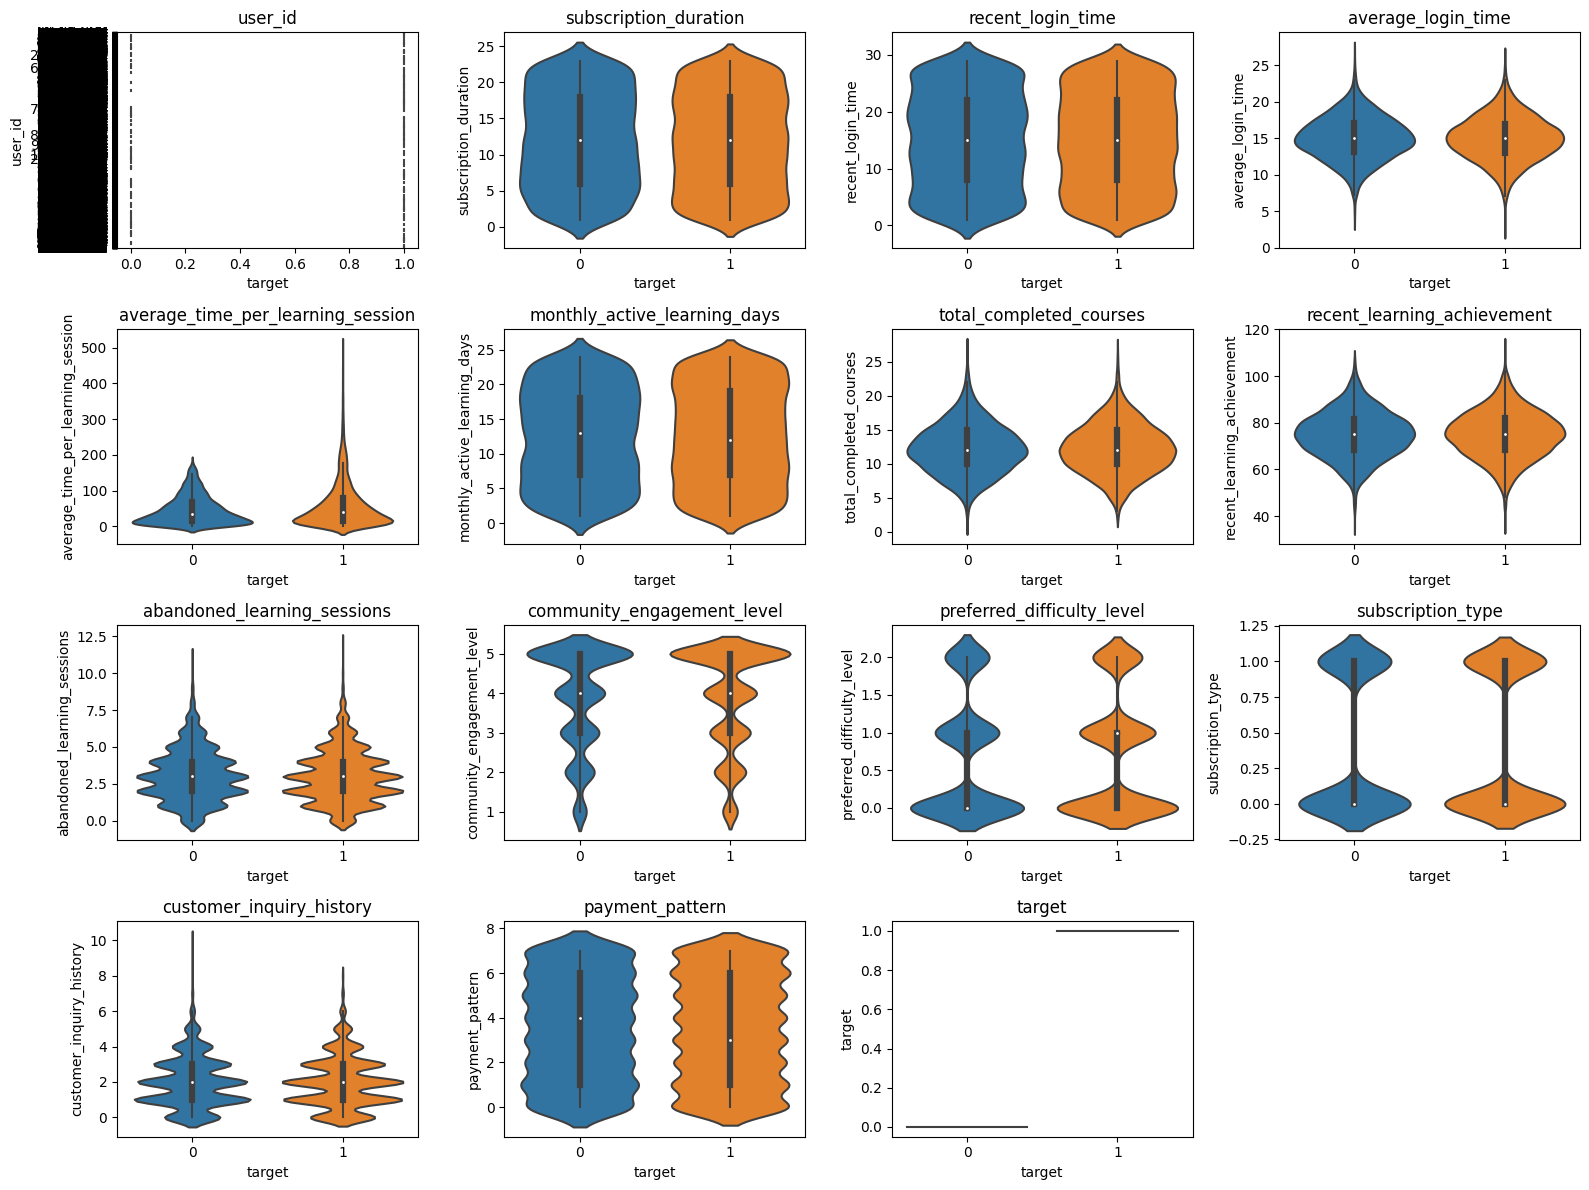

In [ ]:
plt.figure(figsize=(16,12))
i = 0
for col in train_data.columns:
    i += 1
    plt.subplot(4,4,i)
    sns.violinplot(data=train_data, x='target',y=col)
    plt.title(f"{col}")
plt.tight_layout()

# 데이터 정규화

In [ ]:
# 수치형 및 범주형 변수 구분
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64'] and col not in ['target']]
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object' and col not in ['user_id']]

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 수치형 데이터에 대해 스케일링 적용
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

display(train_data)
display(test_data)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,0.167046,-0.121165,-0.015962,-0.829869,0.786885,1.038128,-0.669045,-0.024844,0.090246,-0.897518,-0.820073,1.400157,0.647774,0
1,a0a60abb,0.621553,0.357181,1.152389,0.316456,0.498363,0.212579,2.261009,-0.594656,-0.702077,0.383187,-0.820073,-0.711163,1.080460,1
2,b9f171ae,1.530566,-1.675788,0.400155,-0.591616,0.065581,0.487762,1.939124,-0.024844,0.090246,0.383187,1.219403,-1.414937,1.513146,1
3,5dc0ba8b,-1.650980,0.476767,0.877690,-0.218820,0.931145,1.588495,-0.489192,-1.734280,-0.702077,-0.897518,-0.820073,-0.711163,-1.515656,1
4,65c83654,-1.196473,-1.197443,2.130972,-0.431503,0.931145,-0.612970,0.691049,-0.594656,0.090246,0.383187,-0.820073,0.696384,-1.515656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,1.530566,1.672631,-0.088767,0.520083,0.786885,1.038128,-1.009498,-0.594656,0.882568,-0.897518,1.219403,-0.711163,-1.082970,1
9996,24588752,-0.287460,-0.479924,1.459157,-0.168737,-0.511462,-1.163337,0.774549,-0.024844,-0.702077,0.383187,-0.820073,-0.007390,1.513146,1
9997,e4622a54,-0.741967,1.433458,1.081681,1.292087,1.652449,0.487762,0.655930,-0.024844,0.882568,1.663893,-0.820073,-0.711163,1.080460,1
9998,e07fbad9,-0.135958,-0.958270,1.262518,-0.885740,-0.367201,-0.612970,1.490379,0.544968,0.882568,-0.897518,-0.820073,-0.007390,-1.515656,1


,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,-0.438962,-0.001579,-1.272946,-0.854502,0.931145,0.762945,0.706764,-0.024844,0.882568,-0.897518,1.219403,-0.007390,1.513146
1,0002c77d,-0.135958,-0.838683,-0.514866,-0.541478,-0.367201,1.038128,0.553422,0.544968,-1.494400,-0.897518,-0.820073,1.400157,0.215088
2,0002df5b,-0.135958,1.553045,1.184030,-0.949816,-0.511462,1.863678,-0.135689,1.114781,0.882568,-0.897518,1.219403,-0.711163,-0.217598
3,000b6068,0.318548,0.237594,-0.536614,-0.598455,-0.078680,-1.713703,-1.175245,-1.734280,0.090246,1.663893,1.219403,-0.711163,0.647774
4,00184a0c,1.076059,-1.077856,-1.024218,-0.656725,-0.655723,0.762945,-1.919122,-1.164468,0.090246,0.383187,-0.820073,-0.711163,-0.217598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,-0.287460,1.074699,-1.022613,0.630710,1.075406,2.414044,-0.449172,0.544968,0.882568,0.383187,1.219403,-0.711163,1.080460
9996,ffe710f1,0.470051,1.313872,-0.865742,-0.798121,0.786885,-1.438520,-0.749463,-0.594656,-1.494400,0.383187,-0.820073,0.696384,0.647774
9997,ffeccdef,-0.893469,-0.240751,0.680522,-0.617101,1.363928,-0.888154,1.431024,1.114781,-1.494400,0.383187,-0.820073,-0.711163,-1.515656
9998,fff3fcea,0.924557,-0.719097,0.254555,1.813660,0.065581,-0.612970,0.721193,-0.594656,0.882568,-0.897518,1.219403,-0.007390,0.647774


# 데이터 분리

In [ ]:
X = train_data.loc[:, 'subscription_duration':'payment_pattern'] #정답을 뺀 학습값 분리
y = train_data.loc[:, 'target'] #정답 분리
test_data = test_data.loc[:, 'subscription_duration':'payment_pattern'] #정답을 뺀 학습값 분리

print(X.shape)
print(y.shape)
print(test_data.shape)
y.value_counts() # values 값 이진분류

(10000, 13)
(10000,)
(10000, 13)


1    6199
0    3801
Name: target, dtype: int64

# 데이터 전처리-원핫 인코딩

In [ ]:
X_one_hot = pd.get_dummies(X)
test_data_one_hot = pd.get_dummies(test_data)

# 모델링

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.2, random_state=1)

# 테스트

In [ ]:
X_train = X_train[['average_time_per_learning_session', 'customer_inquiry_history']]
X_test= X_test[['average_time_per_learning_session', 'customer_inquiry_history']]

# KNN model

In [ ]:
# 학습
clf_knn =  KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = clf_knn.predict(X_test)
val_f1 = f1_score(y_test, val_predictions, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, val_predictions, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.5231287793882394
              precision    recall  f1-score   support

           0       0.41      0.42      0.42       770
           1       0.63      0.62      0.63      1230

    accuracy                           0.55      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.55      0.55      0.55      2000



In [ ]:
# 테스트 데이터에 대한 예측 수행
test_data_one_hot=test_data_one_hot[['average_time_per_learning_session', 'customer_inquiry_history']] #TEST4
test_predictions = clf_knn.predict(test_data_one_hot)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample_submission['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
#submit_path = 'C:/Users/jack/Downloads/open/sample_submission.csv'
#sample_submission.to_csv(submit_path, index=False)

#sample_submission